In [ ]:
import pandas as pd
import numpy as np


# Reading the data

In [ ]:
df=pd.read_csv('webtraffic.csv')
df.head()


In [ ]:
df.shape

(4896, 2)

In [ ]:
df.info

<bound method DataFrame.info of       Hour Index    Sessions
0              0  1418159421
1              1  1113769116
2              2   919158921
3              3   822352824
4              4   735526737
...          ...         ...
4891        4891  2555880561
4892        4892  2454084459
4893        4893  2405182410
4894        4894  2356280361
4895        4895  1987019991

[4896 rows x 2 columns]>

In [ ]:
df.head(50)

NameError: ignored

In [ ]:
df.isnull().sum()

Hour Index    0
Sessions      0
dtype: int64

## Plot Your data

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df.columns

Index(['Hour Index', 'Sessions'], dtype='object')

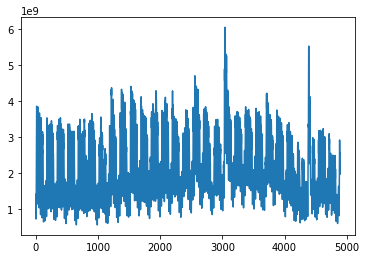

In [ ]:
df['Sessions'].plot()


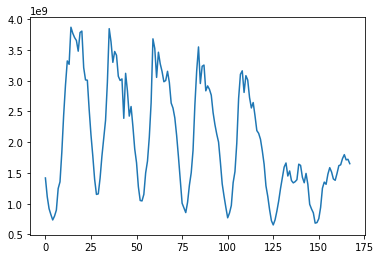

In [ ]:
df['Sessions'].iloc[:168].plot()

## check the stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(df):
     dftest = adfuller(df, autolag = 'AIC')
#      print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
#      print("3. Num Of Lags : ", dftest[2])
#      print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
#      print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sessions'])

2. P-Value :  3.632587067865354e-16
	 1% :  -3.431695415409747
	 5% :  -2.8621345244394583
	 10% :  -2.5670864667133415


## Bulding the model

In [ ]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Sessions'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=201746.479, Time=4.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=203342.692, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=201817.088, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=202091.445, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=203340.694, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=201779.582, Time=2.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=201809.586, Time=5.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=201161.981, Time=4.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=201505.268, Time=3.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=201163.045, Time=6.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=201161.086, Time=6.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=201300.013, Time=4.35 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=201159.809, Time=17.02 sec
 ARIMA(4,1

In [ ]:

import statsmodels.api as sm

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(test.shape)
print(train.shape)

(30, 2)
(4866, 2)


In [ ]:
model = sm.tsa.arima.ARIMA(train['Sessions'], order=(4,1,5))
result = model.fit()

In [ ]:
# result.summary()

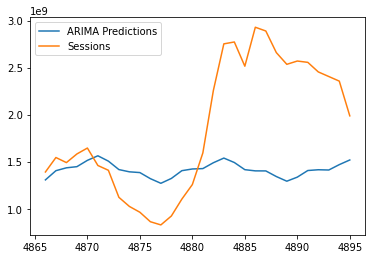

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Sessions'].plot(legend=True)